# Insurance Claims- Fraud Detection


Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [18]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Automobile_insurance_fraud.csv",engine='python')

In [20]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [21]:
df.shape

(1000, 40)

In [22]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

as _c39 isnt going to help so lets drop it.

In [23]:
df.drop(['_c39'],axis=1,inplace=True)
df.drop(['policy_number'],axis=1,inplace=True)
df.drop(['incident_location'],axis=1,inplace=True)

In [24]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


so over all we hav almost 1000 records

no null values and gor rid of redundant columns

# EDA

__months_as_customer__

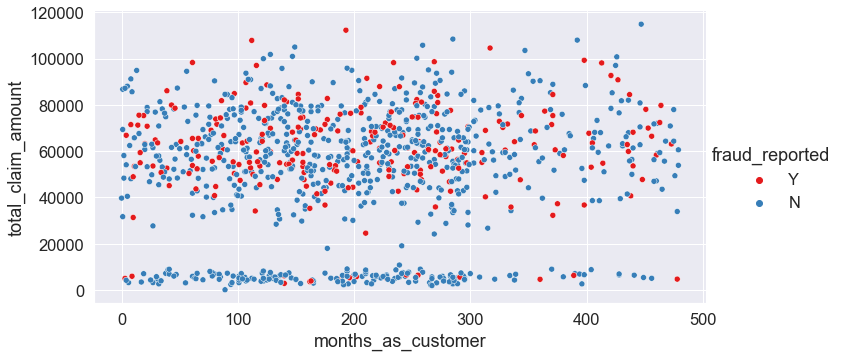

In [25]:
sns.set(font_scale=1.5)
sns.relplot(x='months_as_customer',y='total_claim_amount',hue='fraud_reported',data=df,aspect=2,palette='Set1')

From the above we can see that the majority of the claims was generated from customer who were from 100 to 350, and most of the insurance fraud was reported from new customers below 100.



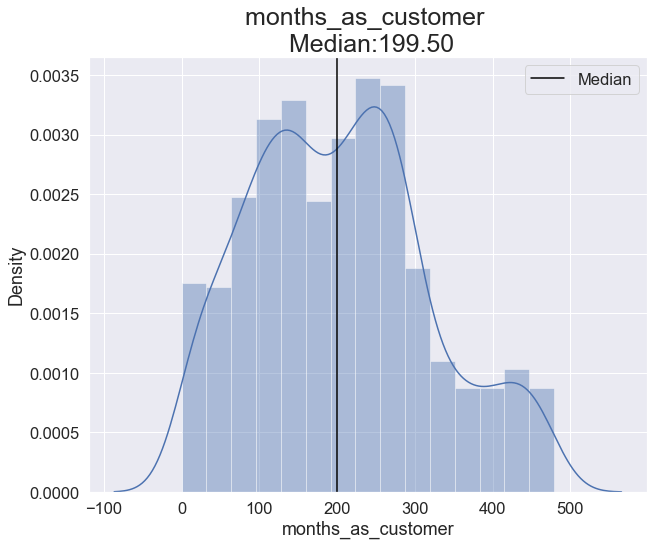

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df['months_as_customer'])
plt.title('months_as_customer \n Median:{0:.2f}'.format(df['months_as_customer'].median()),size=25)
plt.axvline(df['months_as_customer'].median(),color='black',label='Median')
plt.legend()

so average is almost 200 months for a customer is generated in above graph

In [28]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


__age__

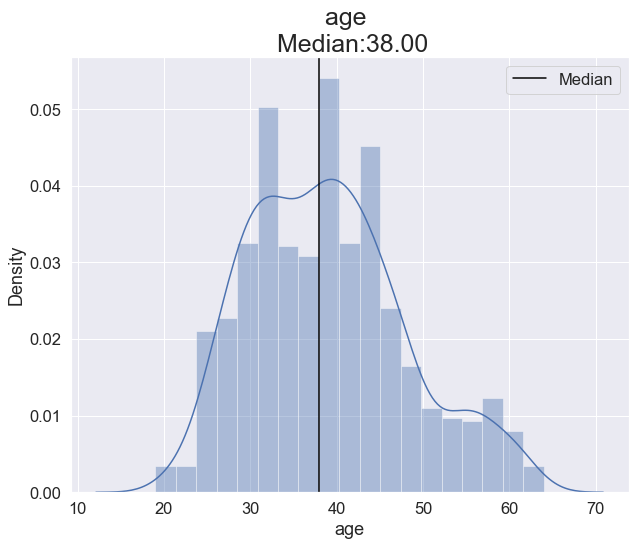

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'])
plt.title('age \n Median:{0:.2f}'.format(df['age'].median()),size=25)
plt.axvline(df['age'].median(),color='black',label='Median')
plt.legend()

looks like formally distributed an age of customers is between 30-50 

In [30]:
df.age.value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

In [33]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


__policy_bind_day__

In [36]:
df['policy_bind_day'] = pd.to_datetime(df.policy_bind_date, format='%d-%m-%Y').dt.day
df['policy_bind_month'] = pd.to_datetime(df.policy_bind_date, format='%d-%m-%Y').dt.month
df['policy_bind_year']= pd.to_datetime(df.policy_bind_date, format='%d-%m-%Y').dt.year

In [37]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


__incident day/month/year__

In [39]:
df['incident_day']=df['incident_date'].str.split('-').str[0].astype(int)
df['incident_month']=df['incident_date'].str.split('-').str[1].astype(int)
df['incident_year']=df['incident_date'].str.split('-').str[2].astype(int)
df.drop(['policy_bind_date'],axis=1,inplace=True)
df.drop(['incident_date'],axis=1,inplace=True)

In [40]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,Volkswagen,Passat,2015,N,5,1,2014,24,1,2015
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,Audi,A5,1998,N,18,11,2011,26,2,2015


__policy_state__

In [41]:
df.policy_state.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

__policy_csl__

In [43]:
df.policy_csl.value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

__policy_deductable__

In [44]:
df.policy_deductable.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

__policy_annual_premium__

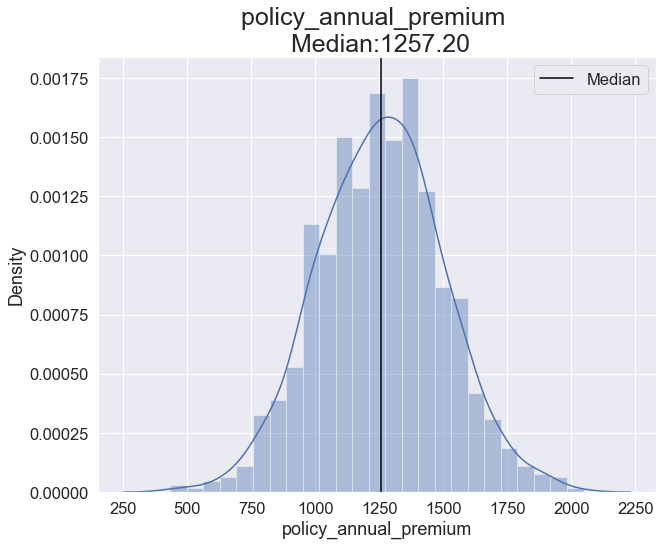

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(df['policy_annual_premium'])
plt.title('policy_annual_premium \n Median:{0:.2f}'.format(df['policy_annual_premium'].median()),size=25)
plt.axvline(df['policy_annual_premium'].median(),color='black',label='Median')
plt.legend()

looks like its normally distributed with median value of 1250

In [46]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


__umbrella_limit__

In [47]:
df.umbrella_limit.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

__insured_zip__

In [49]:
df.insured_zip.value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

In [51]:
#this is the zip code of area so lets drop this
df.drop(['insured_zip'],axis=1,inplace=True)

In [52]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


__insured_sex__

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

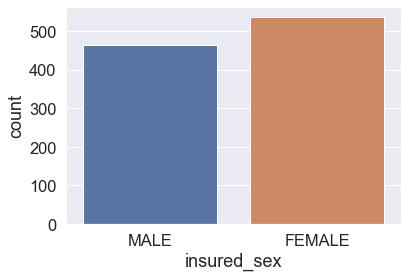

In [54]:
sns.countplot(df.insured_sex)

In [56]:
countmale = len(df[df.insured_sex == 'MALE'])
print("Percentage of male: {:.2f}%".format((countmale / (len(df.insured_sex))*100)))
countfemale = len(df[df.insured_sex == 'FEMALE'])
print("Percentage of FEMALE: {:.2f}%".format((countfemale / (len(df.insured_sex))*100)))

Percentage of male: 46.30%
Percentage of FEMALE: 53.70%


__females are more in the data set than male__

__insured_education_level__

In [63]:
df.insured_education_level.value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

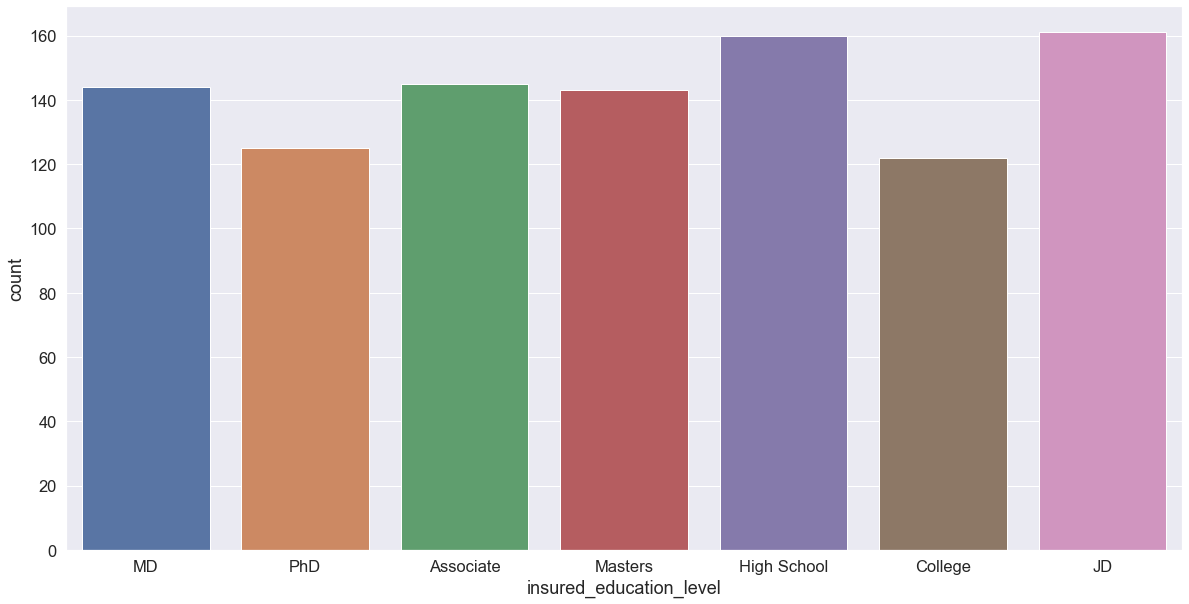

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(df.insured_education_level)

high school and jd are at top, rest all have almost equal count 

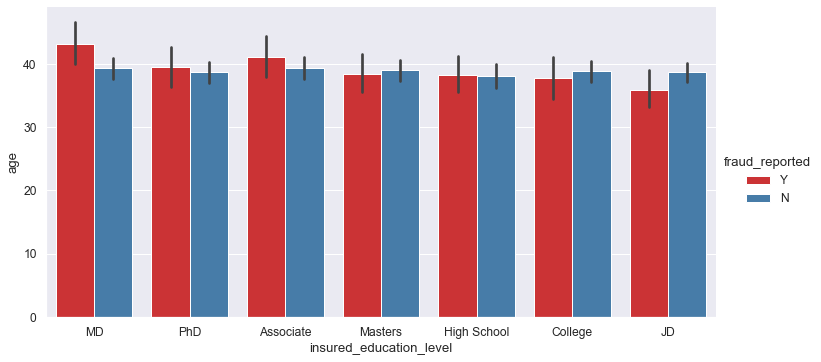

In [145]:
sns.set(font_scale=1.1)
sns.catplot(x='insured_education_level',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')

In [59]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


__insured_occupation__

In [61]:
df.insured_occupation.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

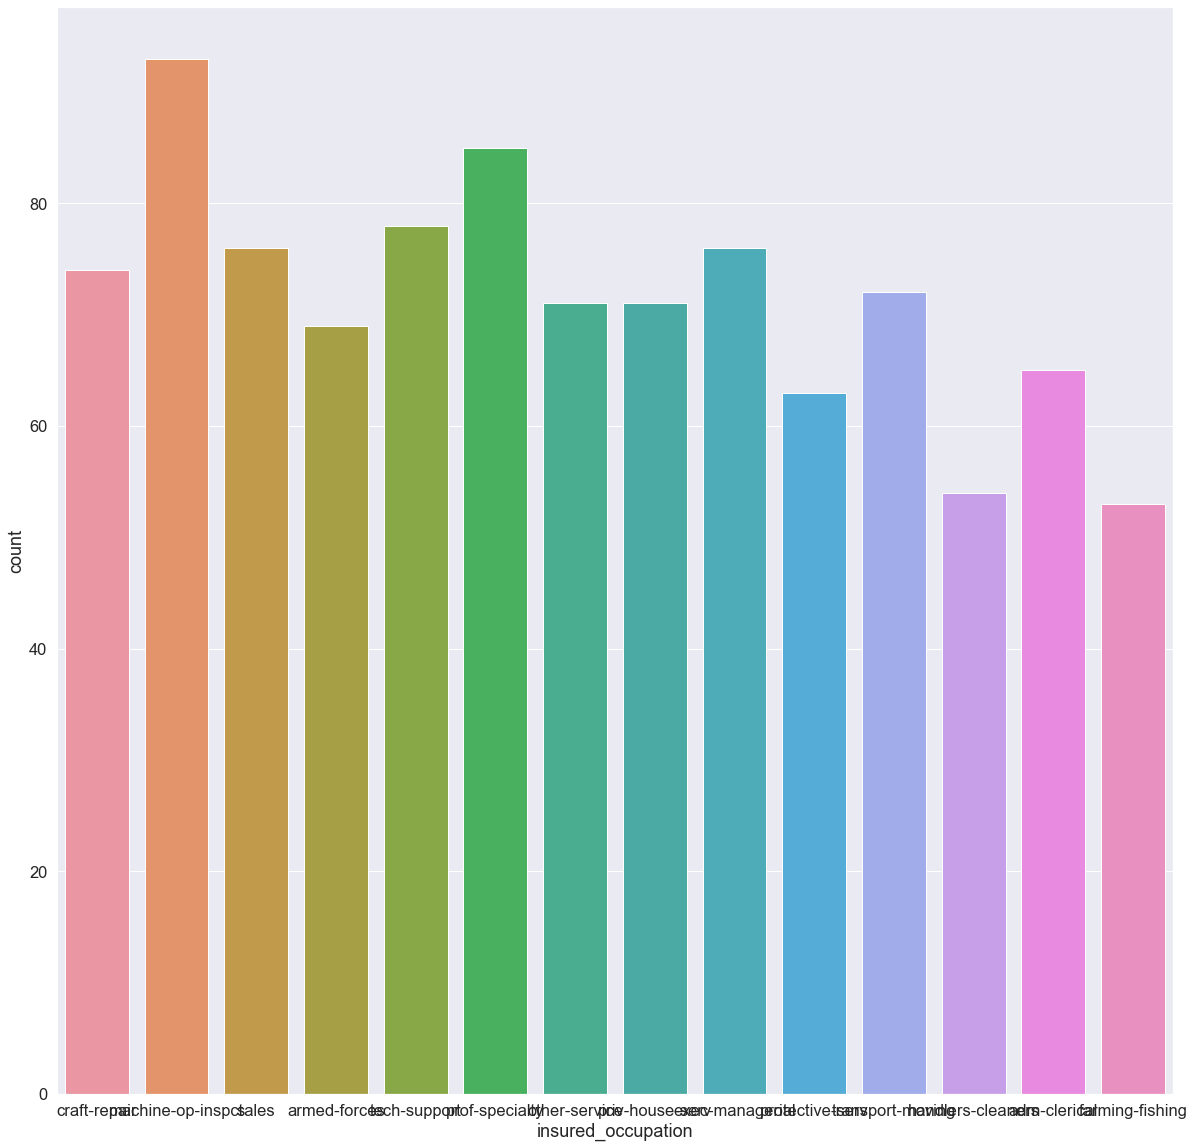

In [65]:
plt.figure(figsize=(20,20))
sns.countplot(df.insured_occupation)

__machine-op-inspct has 93 value count and rest other have almost same count__


__insured_hobbies__

In [67]:
df.insured_hobbies.value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

__insured_relationship__

In [68]:
df.insured_relationship.value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

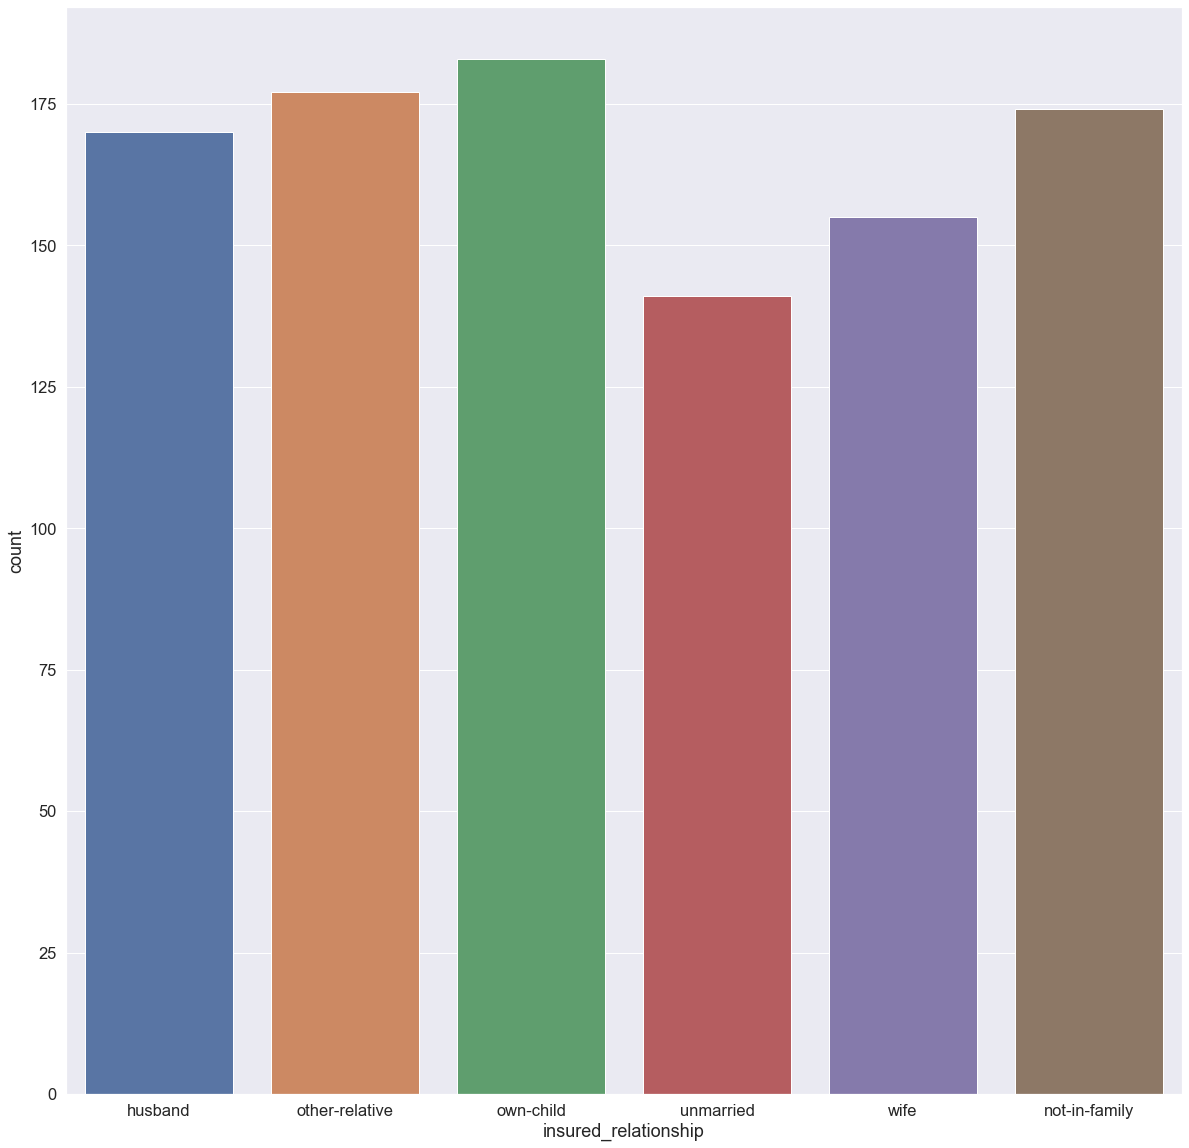

In [69]:
plt.figure(figsize=(20,20))
sns.countplot(df.insured_relationship)

all looks fine ,almost equal

__incident_type__

In [72]:
df.incident_type.value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

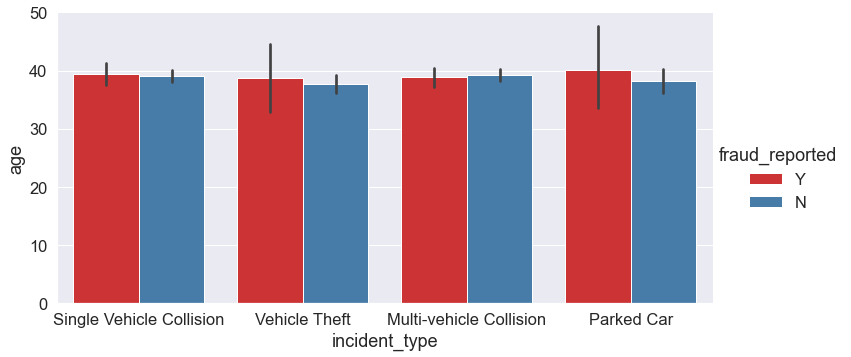

In [74]:
sns.catplot(x='incident_type',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


all incidents type have noth fraud and not fraids equaly distributed

__collision_type__

In [152]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [153]:
df['collision_type'].replace(['?'],['None'],inplace=True)


__incident_severity__

In [75]:
df.incident_severity.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

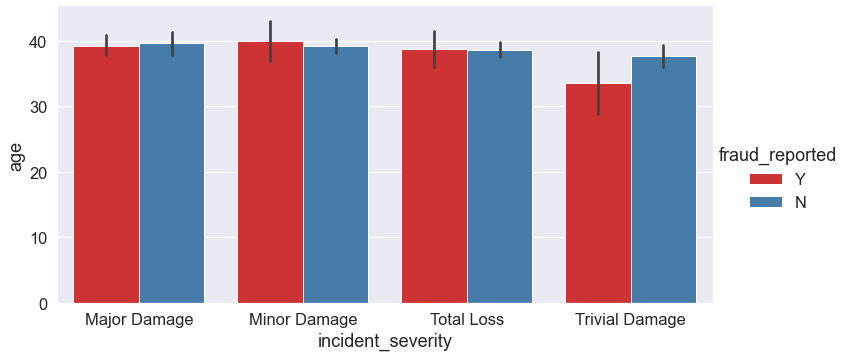

In [76]:
sns.catplot(x='incident_severity',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


__authorities_contacted__ 

In [79]:
df.authorities_contacted.value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

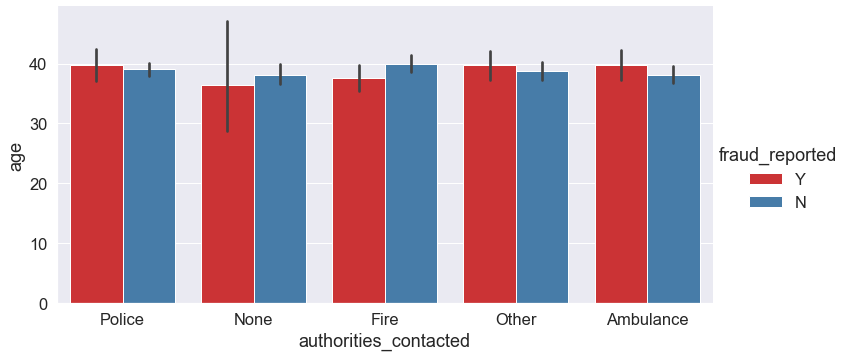

In [80]:
sns.catplot(x='authorities_contacted',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


__incident_state__

In [81]:
df.incident_state.value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

__incident_city__

In [82]:
df.incident_city.value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

__incident_hour_of_the_day__       

In [83]:
df.incident_hour_of_the_day.value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [88]:
def deparrtime(x):
    tt=x
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['incident_hour_of_the_day']=df['incident_hour_of_the_day'].apply(deparrtime)

In [89]:
df.incident_hour_of_the_day.value_counts()

Night        342
Morning      242
Evening      218
Afternoon    198
Name: incident_hour_of_the_day, dtype: int64

__number_of_vehicles_involved__

In [90]:
df.number_of_vehicles_involved.value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

__property_damage__

In [91]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [92]:
df['property_damage'].replace(['?'],['None'],inplace=True)


In [93]:
df.property_damage.value_counts()

None    360
NO      338
YES     302
Name: property_damage, dtype: int64

__bodily_injuries__

In [94]:
df.bodily_injuries.value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

__witnesses__

In [95]:
df.witnesses.value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

__police_report_available__

In [96]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [97]:
df['police_report_available'].replace(['?'],['None'],inplace=True)


In [98]:
df.police_report_available.value_counts()

NO      343
None    343
YES     314
Name: police_report_available, dtype: int64

__total_claim_amount__

In [99]:
df.total_claim_amount.value_counts()

59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64

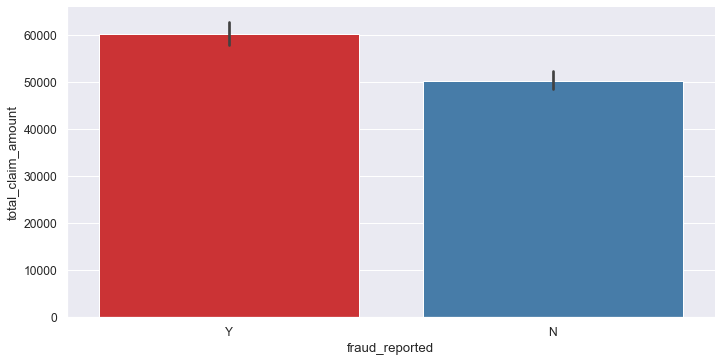

In [147]:
sns.catplot(y='total_claim_amount',x='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


From the above we can see that upto 60,000 claim amount was reported as fraud.



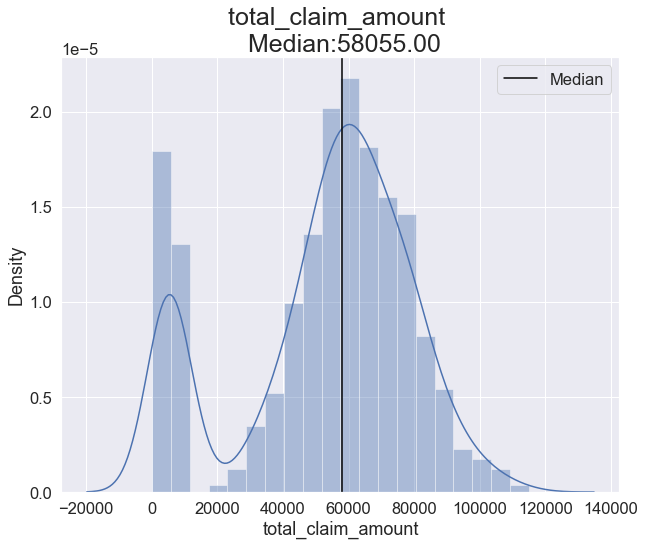

In [100]:
plt.figure(figsize=(10,8))
sns.distplot(df['total_claim_amount'])
plt.title('total_claim_amount \n Median:{0:.2f}'.format(df['total_claim_amount'].median()),size=25)
plt.axvline(df['"total_claim_amount"'].median(),color='black',label='Median')
plt.legend()

<AxesSubplot:xlabel='total_claim_amount'>

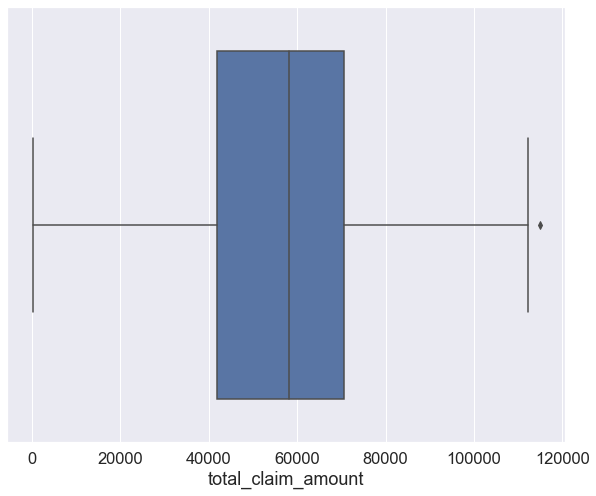

In [102]:
plt.figure(figsize=(10,8))
sns.boxplot(df["total_claim_amount"])


__injury_claim__

In [103]:
df.injury_claim.value_counts()

0        25
480       7
640       7
580       5
6340      5
         ..
16820     1
5960      1
10840     1
8000      1
5530      1
Name: injury_claim, Length: 638, dtype: int64

__property_claim __

In [104]:
df.property_claim.value_counts()

0        19
860       6
660       5
480       5
10000     5
         ..
17880     1
1500      1
14080     1
7850      1
21630     1
Name: property_claim, Length: 626, dtype: int64

__vehicle_claim__

In [105]:
df.vehicle_claim.value_counts()

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64

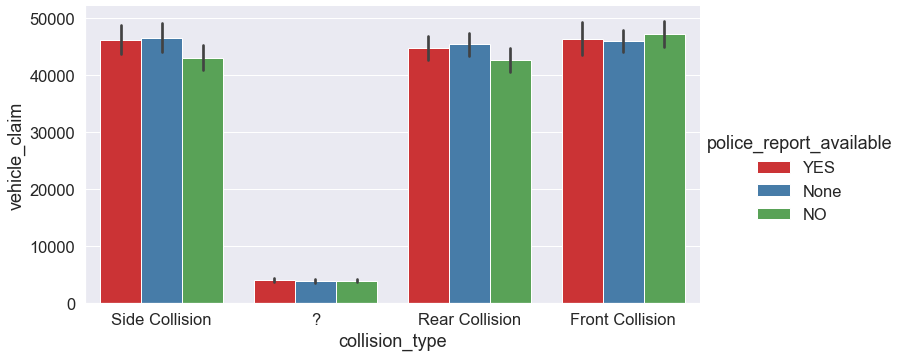

In [150]:
sns.catplot(y='vehicle_claim',x='collision_type',hue='police_report_available',data=df,kind='bar',aspect=2,palette='Set1')


From the above we can see that in most of cases police report was not available which can lead to fraud as collision should be reported, and major collisions were side and front collision.



__auto_make__

In [106]:
df.auto_make.value_counts()

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

__auto_model__

In [107]:
df.auto_model.value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
95                27
F150              27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
X5                23
Ultima            23
Civic             22
Silverado         22
Highlander        22
Fusion            21
ML350             20
CRV               20
Corolla           20
TL                20
Impreza           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

__auto_year__

In [125]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

__capital-loss__

In [130]:
df_pd = pd.DataFrame(df)

In [131]:
df_pd.rename(columns ={'capital-gains':'capitalgains','capital-loss':'capitalloss'},inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capitalgains                 1000 non-null   int64  
 13  capitalloss        

In [134]:
df.capitalgains.value_counts()

0         508
46300       5
68500       4
51500       4
48900       3
         ... 
47700       1
94800       1
90700       1
100500      1
54800       1
Name: capitalgains, Length: 338, dtype: int64

In [135]:
df.capitalloss.value_counts()

 0        475
-53700      5
-50300      5
-31700      5
-49200      4
         ... 
-32600      1
-46800      1
-50600      1
-40800      1
-43900      1
Name: capitalloss, Length: 354, dtype: int64

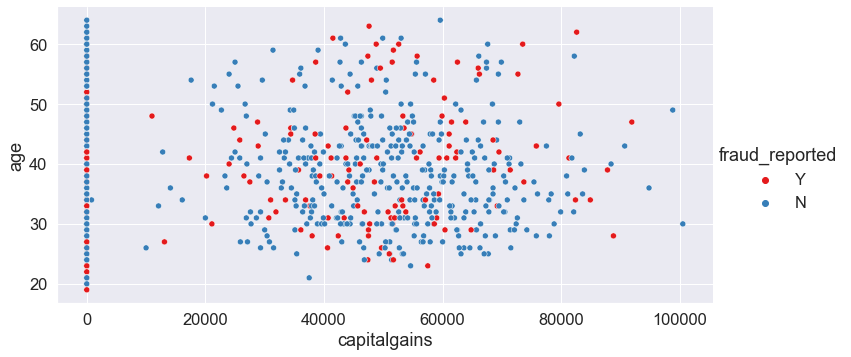

In [149]:
sns.set(font_scale=1.5)
sns.relplot(x='capitalgains',y='age',hue='fraud_reported',data=df,aspect=2,palette='Set1')

# target value - "fraud_reported"

In [136]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [137]:
countno= len(df[df.fraud_reported == 'N'])
print("Percentage of male: {:.2f}%".format((countno / (len(df.fraud_reported))*100)))
countyes = len(df[df.fraud_reported == 'Y'])
print("Percentage of FEMALE: {:.2f}%".format((countyes / (len(df.fraud_reported))*100)))

Percentage of male: 75.30%
Percentage of FEMALE: 24.70%


almost 75% male are fraud in automobile insurance as male usualy run automobile

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

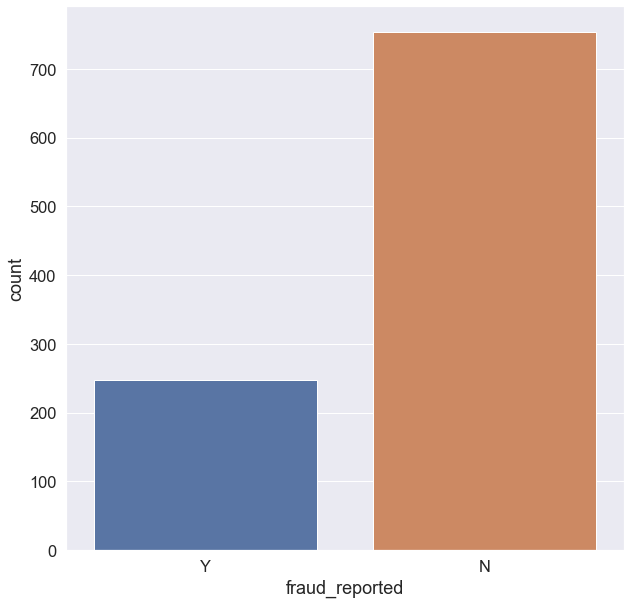

In [141]:
plt.figure(figsize=(10,10))
sns.countplot(df.fraud_reported)

# Lets Check the Correlation.


<AxesSubplot:>

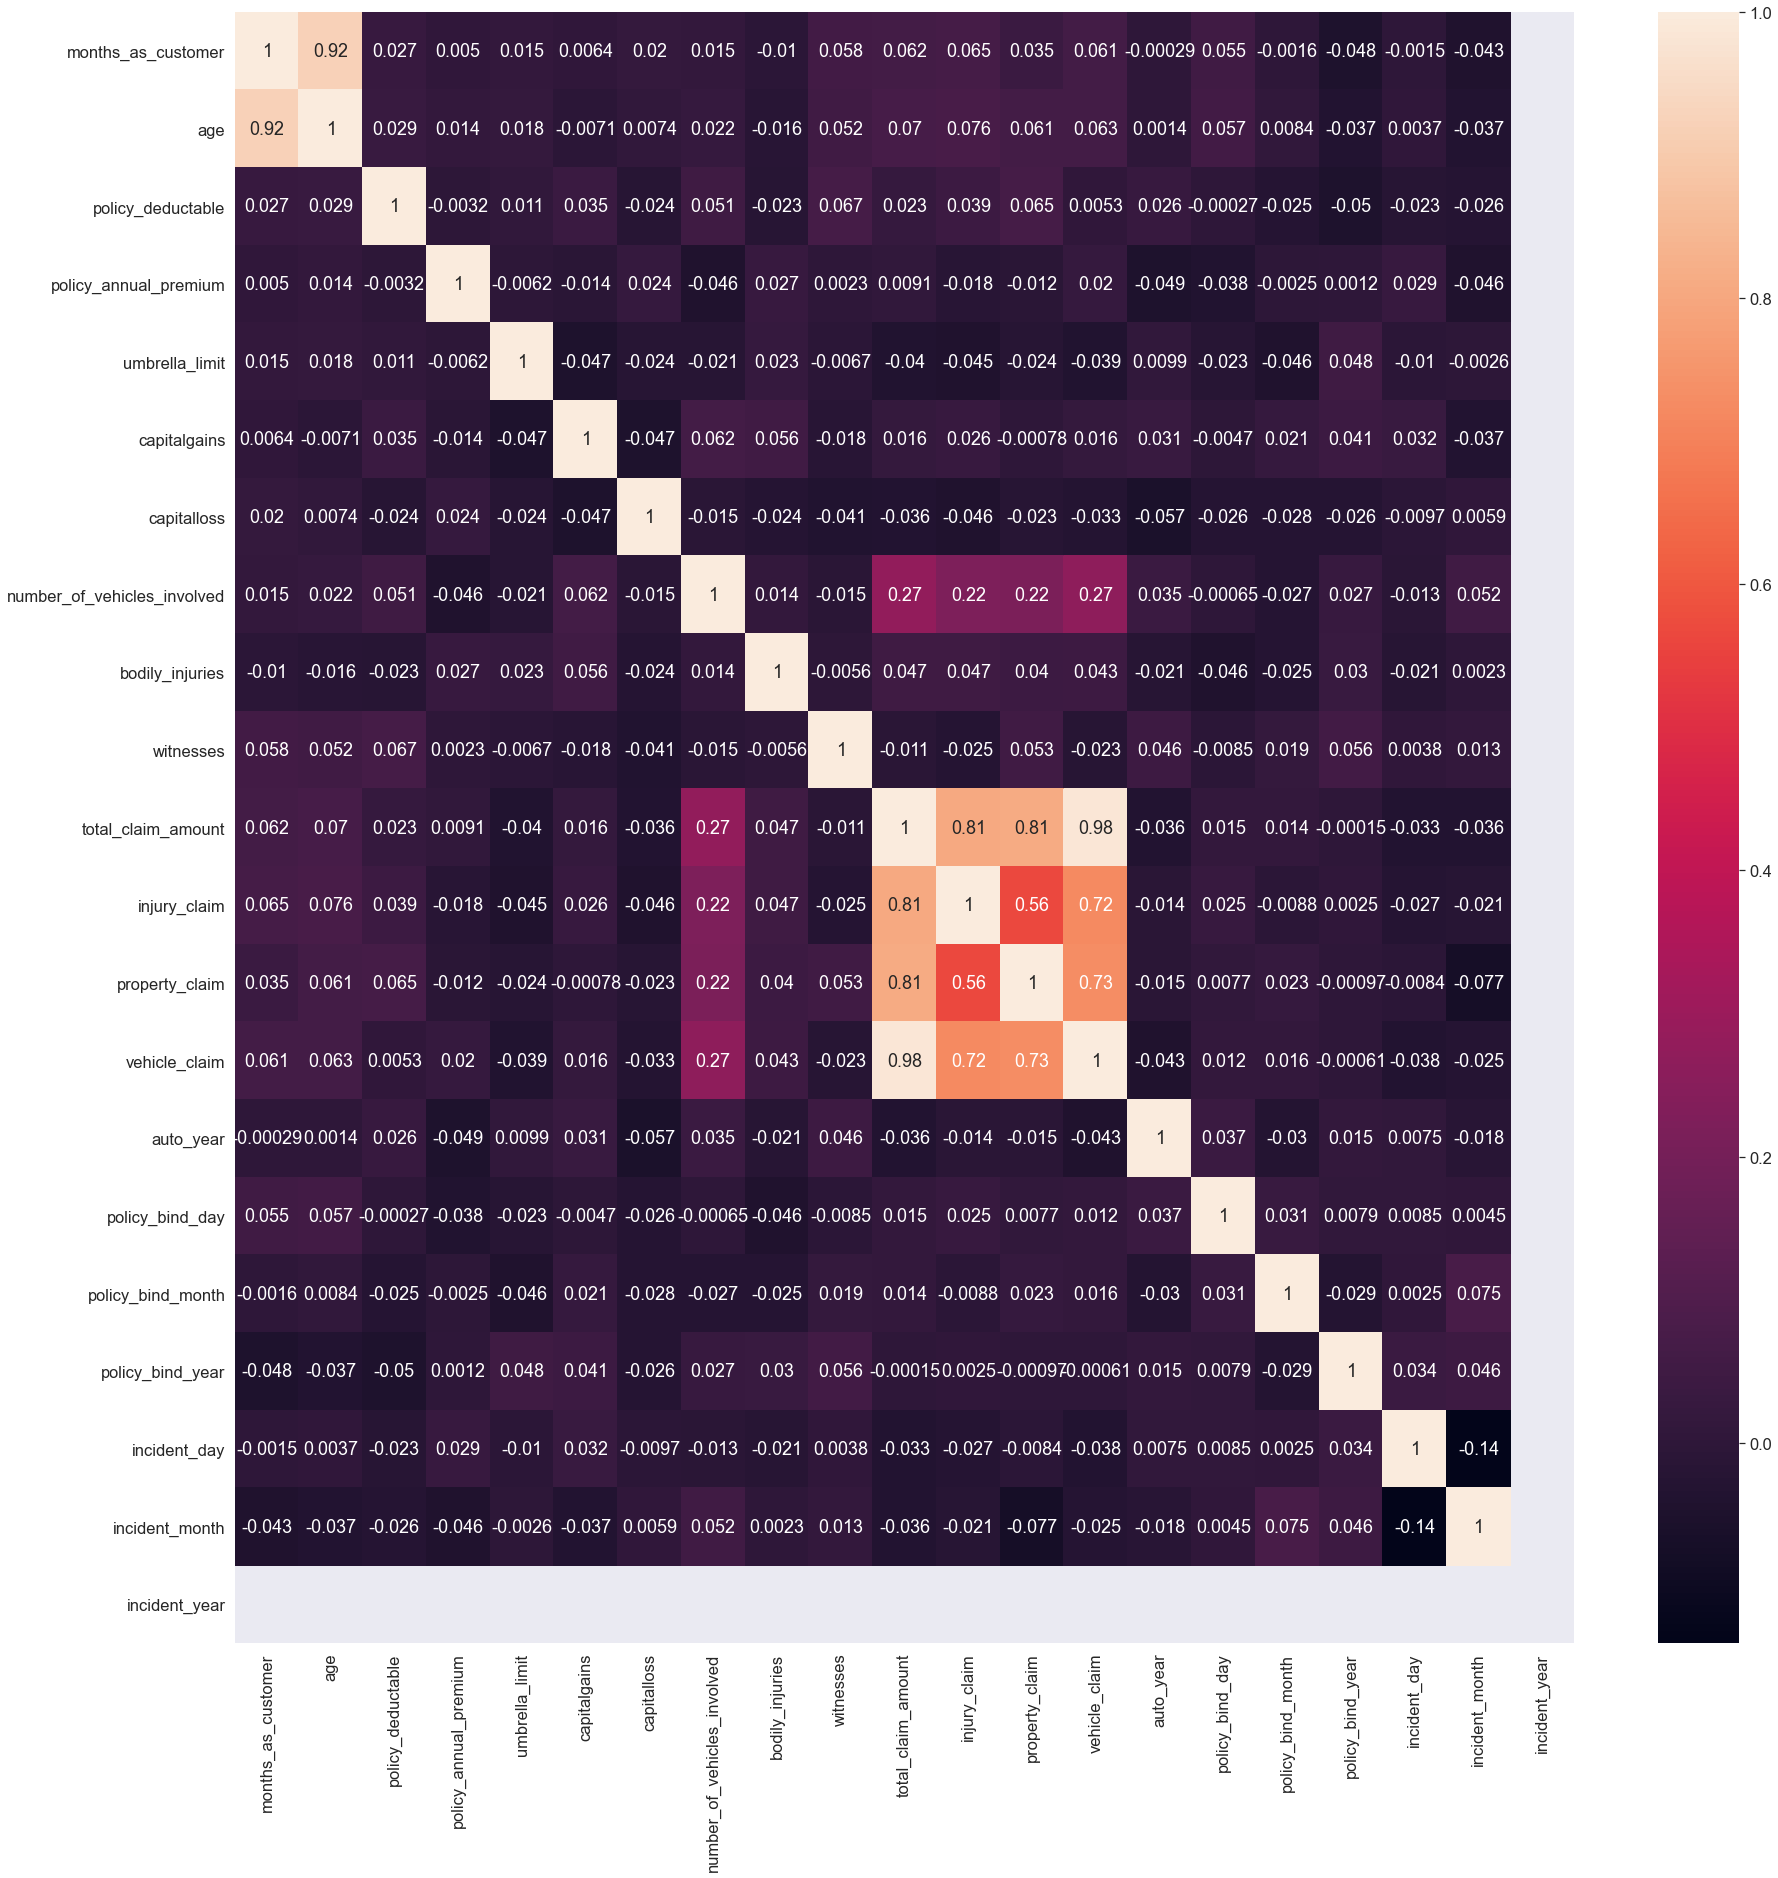

In [143]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)


From the above we can see that total claim amount,injury claim,property claim and vehicle claim are highly correlated with each other, few of the features are slightly correlated with eachother.

In [151]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_hour_of_the_day']=le.fit_transform(df['incident_hour_of_the_day'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])
df['policy_deductable']=le.fit_transform(df['policy_deductable'])
df['umbrella_limit']=le.fit_transform(df['umbrella_limit'])
df['incident_hour_of_the_day']=le.fit_transform(df['incident_hour_of_the_day'])      

In [155]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2,1,1,1406.91,1,1,4,2,...,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,1,2,1197.22,5,1,4,6,...,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,0,2,1413.14,5,0,6,11,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,0,1,2,1415.74,6,0,6,1,...,3,34,2014,1,25,5,1990,10,1,2015
4,228,44,0,2,1,1583.91,6,1,0,11,...,0,31,2009,0,6,6,2014,17,2,2015


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_education_level      1000 non-null   int32  
 9   insured_occupation           1000 non-null   int32  
 10  insured_hobbies              1000 non-null   int32  
 11  insured_relationship         1000 non-null   int32  
 12  capitalgains                 1000 non-null   int64  
 13  capitalloss        

In [158]:
x=df.drop(['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2,1,1,1406.91,1,1,4,2,...,52080,10,1,2004,17,10,2014,25,1,2015
1,228,42,1,1,2,1197.22,5,1,4,6,...,3510,8,12,2007,27,6,2006,21,1,2015
2,134,29,2,0,2,1413.14,5,0,6,11,...,23100,4,30,2007,6,9,2000,22,2,2015
3,256,41,0,1,2,1415.74,6,0,6,1,...,50720,3,34,2014,25,5,1990,10,1,2015
4,228,44,0,2,1,1583.91,6,1,0,11,...,4550,0,31,2009,6,6,2014,17,2,2015


In [160]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [161]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [163]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60,stratify=y)

In [164]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((700, 39), (300, 39), (700,), (300,))

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [166]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=60)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=60)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=60)
ABC=AdaBoostClassifier(random_state=60)
ETC=ExtraTreesClassifier(random_state=60)

In [168]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier()


Accuracy_score =  0.7333333333333333


Cross_Val_Score =  0.716


roc_auc_score =  0.5276249701028461


classification_report
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       226
           1       0.38      0.12      0.18        74

    accuracy                           0.73       300
   macro avg       0.57      0.53      0.51       300
weighted avg       0.67      0.73      0.68       300



[[211  15]
 [ 65   9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC()


Accuracy_score =  0.76


Cross_Val_Score =  0.749


roc_auc_score =  0.5135135135135135


classification_report
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       226
           1       1.00      0.03      0.05        74

    accuracy                          

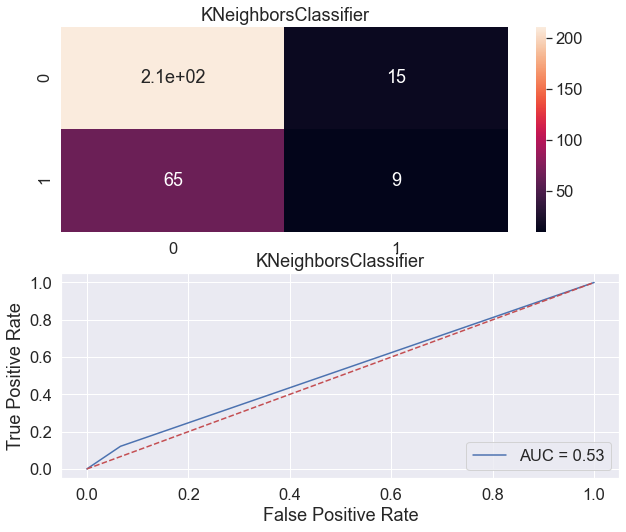

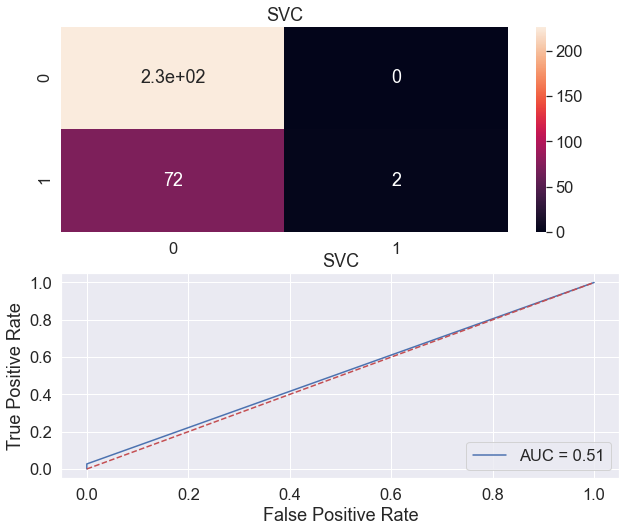

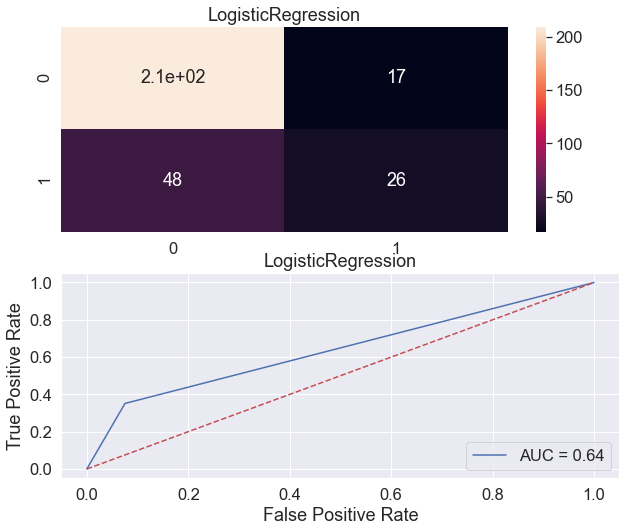

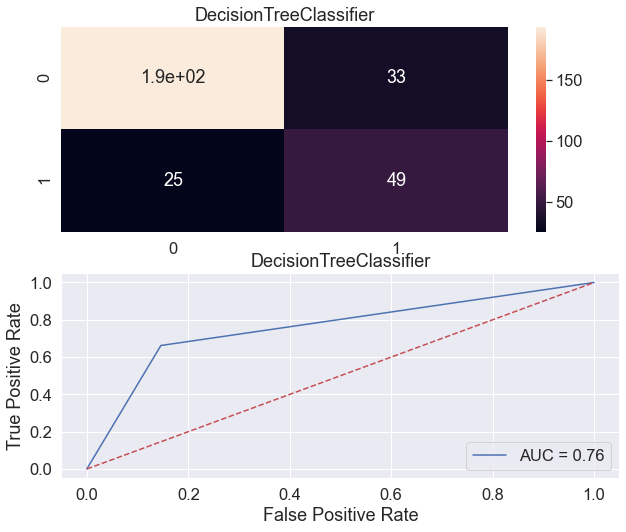

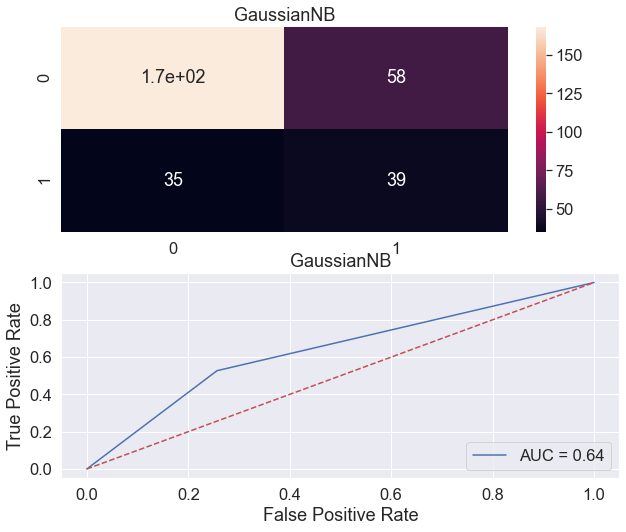

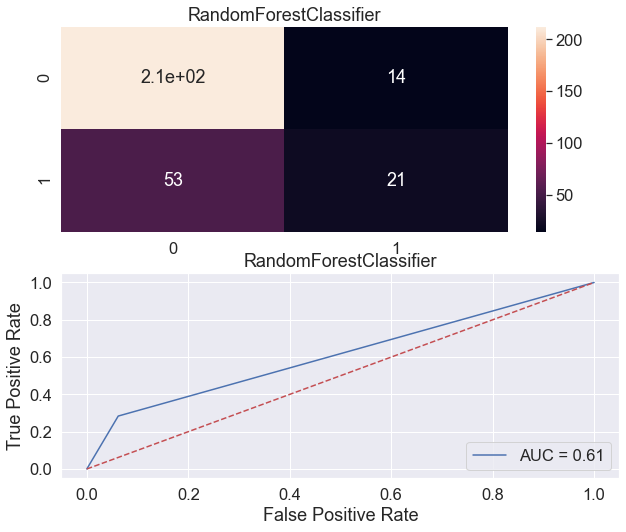

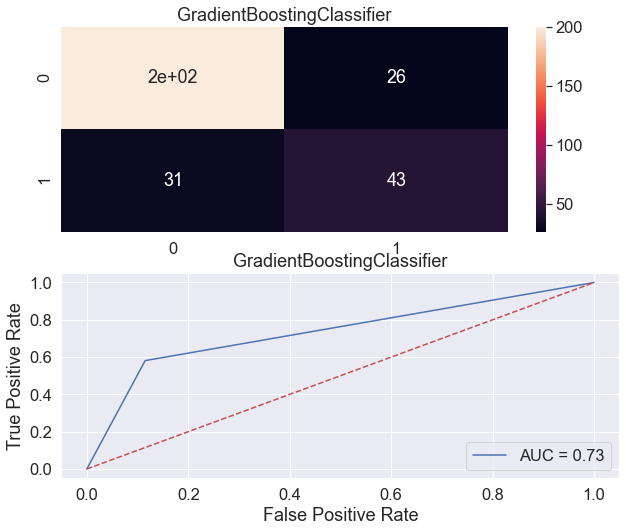

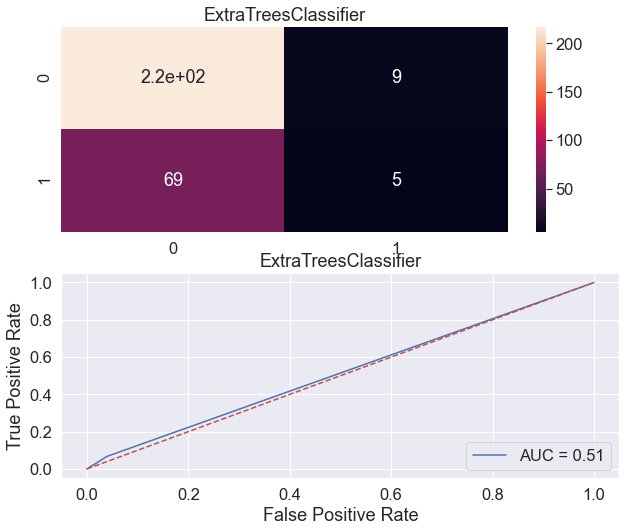

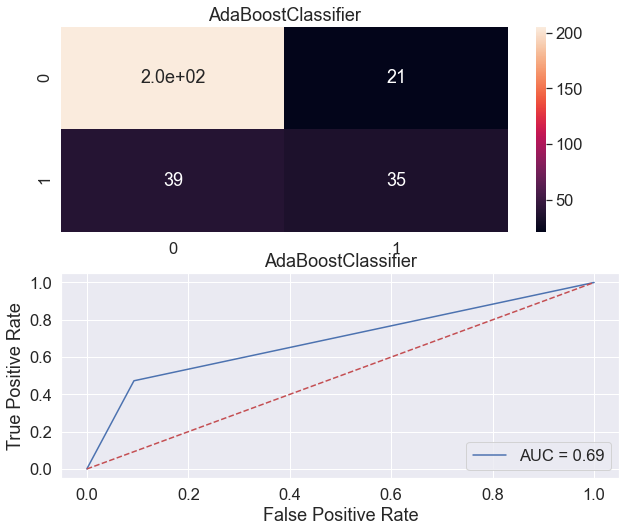

In [169]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [170]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,73.333333,71.6,52.762497
1,SVC,76.000000,74.9,51.351351
2,LogisticRegression,78.333333,77.5,63.806506
3,DecisionTreeClassifier,80.666667,77.0,75.807223
4,GaussianNB,69.000000,72.3,63.519493
5,RandomForestClassifier,77.666667,77.0,61.091844
6,GradientBoostingClassifier,81.000000,81.7,73.301842
7,ExtraTreesClassifier,74.000000,76.1,51.387228
8,AdaBoostClassifier,80.000000,79.6,69.002631


In [182]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [184]:
models = [LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(x_train,y_train)
    
    y_preds = model.predict(x_test)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,x_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [185]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.792857,0.783333,0.783333,0.783333,0.783333,0.762857
1,SVC,0.868571,0.760000,0.760000,0.760000,0.760000,0.751429
2,KNN,0.778571,0.733333,0.733333,0.733333,0.733333,0.702857
3,Random_forest,1.000000,0.806667,0.806667,0.806667,0.806667,0.742857
4,Decision_Treee,1.000000,0.770000,0.770000,0.770000,0.770000,0.737143
5,Gradient_boost,0.977143,0.820000,0.820000,0.820000,0.820000,0.815714
6,Adaboost,0.885714,0.800000,0.800000,0.800000,0.800000,0.770000


* Gradient model gives us the best `Cross validation Score`

In [186]:
from sklearn.model_selection import GridSearchCV

In [188]:
param_dict = {
 'max_depth': [10, 20, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100,200, 400]}

In [201]:
gs_model = GridSearchCV(GradientBoostingClassifier(),param_grid=param_dict,verbose=3)


In [202]:
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.743, total=   1.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.743, total=   1.8s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.757, total=   1.8s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.757, total=   2.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.779, total=   1.9s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.736, total=   5.5s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.736, total=   4.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 22.0min finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400]},
             verbose=3)

In [203]:
gs_model.best_score_  # this is the cross validated hypter tuned score


0.8228571428571427

In [204]:
best_model = gs_model


In [205]:
y_preds = best_model.predict(x_test)


# Saving the model.


In [206]:
import joblib
joblib.dump(best_model,'Auto_Insurance_Fraud_Prediction.pkl')

['Auto_Insurance_Fraud_Prediction.pkl']

In [207]:
model=joblib.load('Auto_Insurance_Fraud_Prediction.pkl')


In [208]:
predictions=model.predict(x_test)


In [209]:
pre = pd.DataFrame(predictions)
pre.columns = ["prediction"]
pre.to_csv("Auto_Insurance_Fraud_Prediction.csv")

# summary

in above model it is summaried that relation analysis between features and target with best visualisation

also best model has been predicted with best hyperparameter tuning and best score was derived and made 82% accuracy

